In [1]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statistics as stat

## Question 1

In [2]:
f = open('numbers.txt','r')

content = f.read()

numbers_list = content.replace('\n', ',').split(",")

numbers_list = [int(x) for x in numbers_list]

f.close()

In [3]:
import collections

frequency = {}
for item in numbers_list:
        if (item in frequency):
            frequency[item] += 1
        else:
            frequency[item] = 1
ordered = collections.OrderedDict(sorted(frequency.items()))
for k, v in ordered.items(): print(k, ":", v)

0 : 9
1 : 14
2 : 19
3 : 20
4 : 22
5 : 10
6 : 26
7 : 17
8 : 13
9 : 24
10 : 14


(array([ 9., 14., 19., 20., 22., 10., 26., 17., 13., 38.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

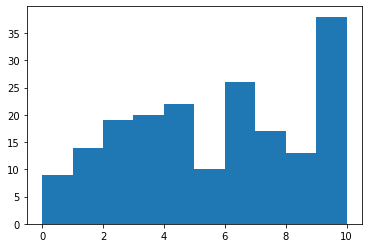

In [4]:
plt.hist(numbers_list)

In [5]:
with open('data.json', 'w') as fp:
    json.dump(frequency, fp)

## Question 2

In [6]:
f = open('amazon-orders.csv','r')

In [7]:
amazon = pd.read_csv('amazon-orders.csv')

In [8]:
amazon.drop(['Order ID', 'Website','Purchase Order Number','Ordering Customer Email',
             'Shipping Address Name','Shipping Address Street 1','Shipping Address Street 2',
             'Order Status','Carrier Name & Tracking Number', 'Shipping Address City',
             'Shipping Address State','Shipping Address Zip','Buyer Name','Group Name'], 
            axis = 1, inplace = True)

amazon.head()

,Order Date,Payment Instrument Type,Shipment Date,Subtotal,Shipping Charge,Tax Before Promotions,Total Promotions,Tax Charged,Total Charged
0,04/01/19,Visa - 0001,04/01/19,$35.00,$0.00,$1.93,$0.00,$1.93,$36.93
1,04/01/19,Visa - 0001,04/01/19,$16.99,$0.00,$0.00,$0.00,$0.00,$16.99
2,04/01/19,Visa - 0001,04/01/19,$9.99,$0.00,$0.00,$0.00,$0.00,$9.99
3,04/04/19,Visa - 0001,04/05/19,$147.98,$0.00,$8.14,$0.00,$8.14,$156.12
4,04/05/19,Visa - 0001,04/07/19,$14.99,$0.00,$0.00,$0.00,$0.00,$14.99


In [9]:
amazon['Total Charged'] = amazon['Total Charged'].str.replace('$', '')
amazon['Total Charged'] = amazon['Total Charged'].astype('float')
amazon['Tax Charged'] = amazon['Tax Charged'].str.replace('$', '')
amazon['Tax Charged'] = amazon['Tax Charged'].astype('float')
amazon['Subtotal'] = amazon['Subtotal'].str.replace('$', '')
amazon['Subtotal'] = amazon['Subtotal'].astype('float')
amazon['Shipping Charge'] = amazon['Shipping Charge'].str.replace('$', '')
amazon['Shipping Charge'] = amazon['Shipping Charge'].astype('float')
amazon['Order Date'] = amazon['Order Date'].astype('datetime64')

/var/folders/b9/nh78rc011ks04l2gkz0qvtnh0000gn/T/ipykernel_88098/3614140729.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amazon['Total Charged'] = amazon['Total Charged'].str.replace('$', '')
/var/folders/b9/nh78rc011ks04l2gkz0qvtnh0000gn/T/ipykernel_88098/3614140729.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amazon['Tax Charged'] = amazon['Tax Charged'].str.replace('$', '')
/var/folders/b9/nh78rc011ks04l2gkz0qvtnh0000gn/T/ipykernel_88098/3614140729.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  amaz

In [10]:
spending = amazon['Total Charged'].to_list()

dates = amazon['Order Date'].to_list()
months = pd.DatetimeIndex(dates).month

tax = amazon['Tax Charged'].to_list()
subtot = amazon['Subtotal'].to_list()
ship = amazon['Shipping Charge'].to_list()

In [14]:
# Summary Stats
print('Summary Statistics of Spending')
print('------------------------------')
print('Maximum Amount Spent on 1 Order:', max(spending))
print('Minimum Amount Spent on 1 Order:', min(spending))
print('Average Amount Spent per Order:', round(stat.mean(spending),2))
print('Median Amount Spent per Order:', stat.median(spending))
print('Standard Deviation of Order Price:', round(stat.stdev(spending),2))

Summary Statistics of Spending
------------------------------
Maximum Amount Spent on 1 Order: 210.99
Minimum Amount Spent on 1 Order: 1.04
Average Amount Spent per Order: 30.13
Median Amount Spent per Order: 15.95
Standard Deviation of Order Price: 36.42


Text(0, 0.5, 'Number of Orders')

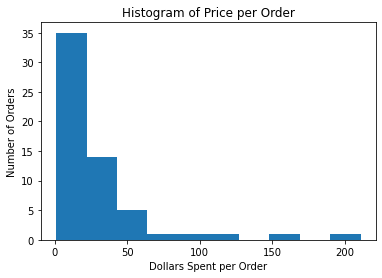

In [15]:
plt.hist(spending)
plt.title('Histogram of Price per Order')
plt.xlabel('Dollars Spent per Order')
plt.ylabel('Number of Orders')

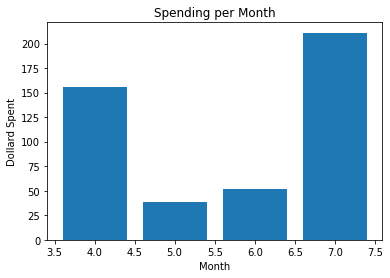

In [16]:
plt.bar(months, spending)
plt.title('Spending per Month')
plt.xlabel('Month')
plt.ylabel('Dollard Spent')
plt.show()

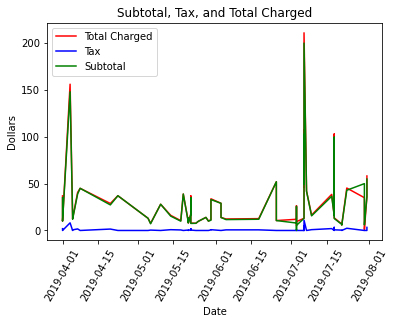

In [17]:
plt.plot(dates, spending, color = 'r', label = 'Total Charged')
plt.plot(dates, tax, color = 'b', label = 'Tax')
plt.plot(dates, subtot, color = 'g', label = 'Subtotal')
plt.xticks(rotation = 60)
plt.title('Subtotal, Tax, and Total Charged')
plt.xlabel('Date')
plt.ylabel('Dollars')
plt.legend()
plt.show()

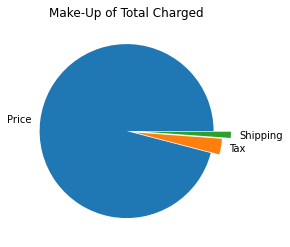

In [18]:
subtot_sum = sum(subtot)
tax_sum = sum(tax)
ship_sum = sum(ship)

subtot_v_tax = [subtot_sum, tax_sum, ship_sum]
labels = ['Price','Tax', 'Shipping']

plt.pie(subtot_v_tax, labels = labels, explode = [0, 0.1, 0.2])
plt.title('Make-Up of Total Charged')
plt.show()